<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1">Loading data</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1">Conclusion</a></span></li></ul></li><li><span><a href="#Matrix-multiplication" data-toc-modified-id="Matrix-multiplication-2">Matrix multiplication</a></span><ul class="toc-item"><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-2.1">Conclusion:</a></span></li></ul></li><li><span><a href="#Conversion-algorithm" data-toc-modified-id="Conversion-algorithm-3">Conversion algorithm</a></span></li><li><span><a href="#Algorithm-verification" data-toc-modified-id="Algorithm-verification-4">Algorithm verification</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1">Conclusion</a></span></li></ul></li></ul></div>

# Protection of clients' personal data

We need to protect the data of the insurance company's customers. Developing a data transformation method is necessary so recovering personal information from them isn't accessible. It is required to justify the correctness of its work.

You need to protect the data so that the quality of the machine learning models does not deteriorate during the transformation. There is no need to select the best model.

## Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,7)})

In [2]:
df = pd.read_csv('insurance.csv')
display(df.info(), df.describe(), df.sample(5,random_state=12345))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
3183,0,33.0,39000.0,4,0
1071,0,50.0,43100.0,2,2
2640,1,39.0,42100.0,0,0
2282,0,20.0,34800.0,0,0
1595,0,41.0,40000.0,4,0


<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>

We have data on 5,000 customers. We know the following about them:
- Gender (Boolean value)
- Age (from 18 to 65 years old)
- Salary (from 5300 to 79000 conventional units)
- Number of family members (from 0 to 6)
- Number of insurance payments (from 0 to 5)
    
There are no gaps in the data, and all values are within normal limits.
    
<hr>

- It is necessary to look at the unique values in the data and double-check if all the values are in order.
- Bring data to the required formats and reduce the weight of the table
</div>

In [3]:
for column in df.columns:
    print(f'unique values in column {column}: \n',
         sorted(df[column].unique()), '\n')

unique values in column Пол: 
 [0, 1] 

unique values in column Возраст: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 65.0] 

unique values in column Зарплата: 
 [5300.0, 6000.0, 7400.0, 8900.0, 9800.0, 10000.0, 10600.0, 10800.0, 11000.0, 11200.0, 11300.0, 12200.0, 12900.0, 13000.0, 13200.0, 13300.0, 13400.0, 13500.0, 13800.0, 13900.0, 14100.0, 14300.0, 14400.0, 14500.0, 14600.0, 14700.0, 15000.0, 15100.0, 15200.0, 15600.0, 15700.0, 15900.0, 16000.0, 16200.0, 16300.0, 16400.0, 16500.0, 16600.0, 16700.0, 17000.0, 17100.0, 17300.0, 17400.0, 17500.0, 17600.0, 17700.0, 17800.0, 17900.0, 18100.0, 18200.0, 18300.0, 18400.0, 18600.0, 18700.0, 18800.0, 18900.0, 19000.0, 19100.0, 19200.0, 19300.0, 19400.0, 19600.0, 19700.0, 19900.0, 20000.0, 20100.0, 20200.0, 20300.0, 20

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
There are strange Salary values in the table. As we can see, most of the values are integers and a multiple of 100 conventional units. Some values have odd decimal values; we will round them up. This will not affect the project's final result in any way, but it will allow you to convert the data to an integer type.
</div>

In [4]:
df['Зарплата'] = round(df['Зарплата'],0)
print(sorted(df['Зарплата'].unique()))

[5300.0, 6000.0, 7400.0, 8900.0, 9800.0, 10000.0, 10600.0, 10800.0, 11000.0, 11200.0, 11300.0, 12200.0, 12900.0, 13000.0, 13200.0, 13300.0, 13400.0, 13500.0, 13800.0, 13900.0, 14100.0, 14300.0, 14400.0, 14500.0, 14600.0, 14700.0, 15000.0, 15100.0, 15200.0, 15600.0, 15700.0, 15900.0, 16000.0, 16200.0, 16300.0, 16400.0, 16500.0, 16600.0, 16700.0, 17000.0, 17100.0, 17300.0, 17400.0, 17500.0, 17600.0, 17700.0, 17800.0, 17900.0, 18100.0, 18200.0, 18300.0, 18400.0, 18600.0, 18700.0, 18800.0, 18900.0, 19000.0, 19100.0, 19200.0, 19300.0, 19400.0, 19600.0, 19700.0, 19900.0, 20000.0, 20100.0, 20200.0, 20300.0, 20400.0, 20500.0, 20600.0, 20700.0, 20800.0, 20900.0, 21000.0, 21100.0, 21200.0, 21300.0, 21400.0, 21500.0, 21600.0, 21700.0, 21800.0, 21900.0, 22000.0, 22100.0, 22200.0, 22300.0, 22500.0, 22600.0, 22700.0, 22800.0, 22900.0, 23000.0, 23100.0, 23200.0, 23300.0, 23400.0, 23500.0, 23600.0, 23700.0, 23800.0, 23900.0, 24000.0, 24100.0, 24200.0, 24300.0, 24400.0, 24500.0, 24600.0, 24700.0, 24800

In [5]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int8 
 1   Возраст            5000 non-null   int8 
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int8 
 4   Страховые выплаты  5000 non-null   int8 
dtypes: int32(1), int8(4)
memory usage: 39.2 KB


<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
We cast all values to an integer type, now the data takes the minimum amount of weight
</div>

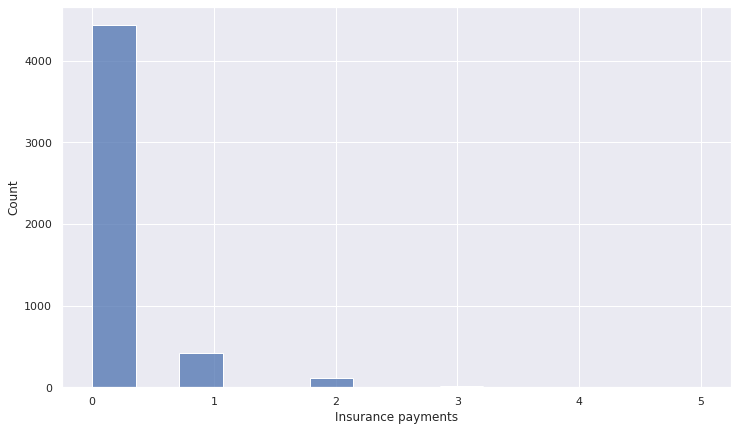

In [6]:
try:
    sns.histplot(df['Страховые выплаты'])
    plt.xlabel(f'Insurance payments')
    plt.show()
except:
    plt.hist(df['Страховые выплаты'], bins=15)
    plt.title(f'Insurance payments')
    plt.show()

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>

### Conclusion
    
The data is clean. Lots of zero insurance premiums, it's okay; we're talking about insurance. The lower the insurance payments, the higher the profit. Here, the first column of the histogram is essentially an indicator of the company's success.
    
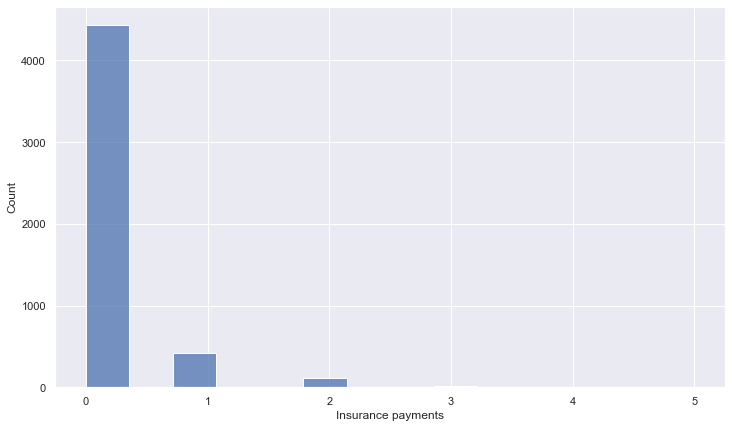
    
We did everything that could be done at the data preparation stage. Duplicates cannot be removed, data without gaps, and file size is reduced by almost five times without loss of information. Strange values in Salary rounded up.
</div>

## Matrix multiplication

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
It is necessary to find out and justify the following assumption.
The features are multiplied by an invertible matrix. Will the quality of linear regression change?

**Answer:** Will not change

**Rationale:**
</div>

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
We have the following information:

In linear regression, features are represented as a vector of numbers in an n-dimensional space (let's call it X).

We can express the learning task in vector form. The training dataset is represented as a matrix X, where rows correspond to objects and columns correspond to features. We denote the parameters of linear regression as w and w0. To obtain a prediction vector a, we multiply the matrix X by the vector w and add the bias term w0. The formula for this is:
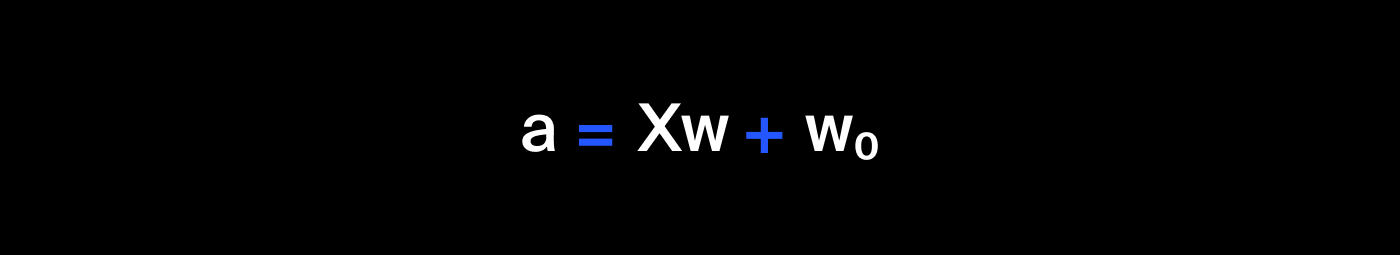

To simplify notation, we add a column of ones to the matrix X (as the zeroth column), and add the bias term w0 to the vector w.
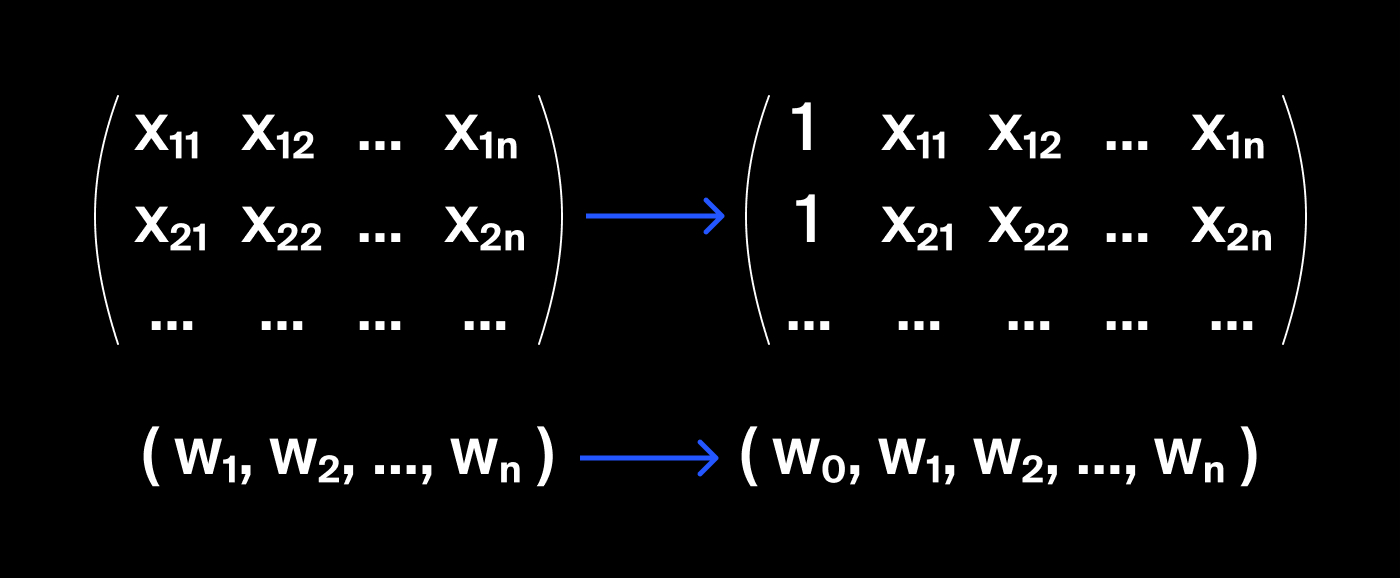

Next, we multiply the matrix X by the vector w. The bias term is multiplied by a vector of ones (the zeroth column). This gives us the prediction vector a:
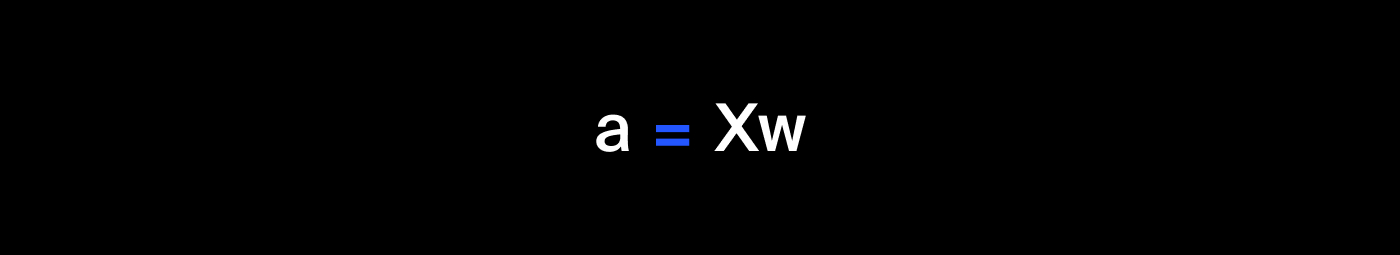

The vector y represents the target feature values for the training dataset. We can express the learning task for linear regression with mean squared error (MSE) loss using the following formula:
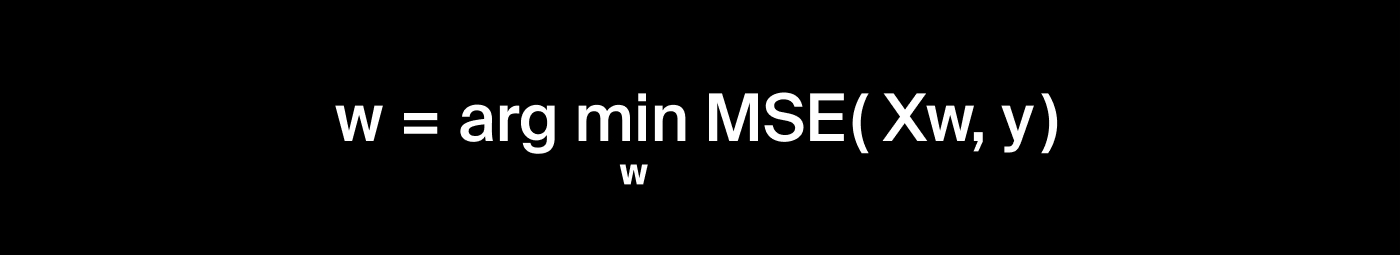

The minimum value of MSE is obtained when the weights are equal to this quantity:
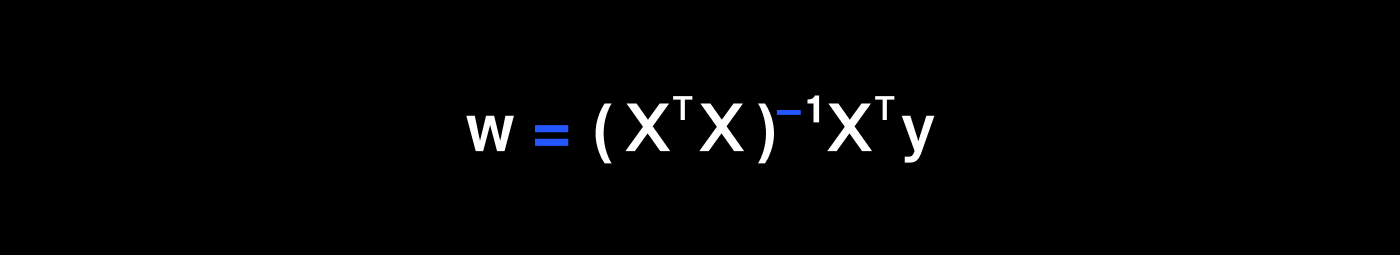

We can derive this formula as follows:

- Multiply the transpose of the feature matrix by itself.
- Calculate the inverse of the resulting matrix.
- Multiply the inverse by the transpose of the feature matrix.
- Finally, multiply the result by the vector of target feature values. 
    
We need to prove that when we multiply our feature matrix X by an invertible matrix, the quality of linear regression remains unchanged. In other words, the value of a remains the same.

</div>

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
<b>Let's introduce some notation</b>
<br>
    
<center> $X$ — feature matrix (zero column consists of ones);</center>
<center> $P$ - invertible matrix by which features are multiplied;</center>
<center> $X^{'}$ - result of matrix X multiplication by invertible matrix P;</center>
<center> $E$ - identity matrix;</center>
<center> $y$ — target feature vector;</center>
<center> $w$ is the vector of linear regression weights (the zero element is equal to the shift).</center>
    


<hr>

<b>Formulas and signs of matrices necessary for the proof:</b>
   
1. Prediction formula:

<center> $a = Xω$;</center>

* Learning task:

<center>$w = \arg\min_w MSE(Xw, y)$;</center>

2. Learning formula:

<center>$ω = (X^{T}X)^{-1} X^{T} y$;</center>
    
 
3. Feature matrix after multiplication by an invertible matrix:
    
<center>$X^{'} = XP$.</center>


<hr>
Signs for matrices:

<center>4. $(AB)^{T} = B^{T}A^{T}$;</center>
<center>5. $(AB)^{-1} = B^{-1}A^{-1}$;</center>
<center>6. $A^{-1}A = AA^{-1} = E$;</center>
<center>7. $EA = AE = A$.</center>
    
</div>

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
- Substitute in formula 1 the value of ω from formula 2:

<center>$a = X*(X^{T}X)^{-1} X^{T} y$;</center>


- Let's write what $a^{'}$ will be equal to for our invertible matrix $X^{'}$:

<center>$a^{'} = X^{'}*(X^{'T}X^{'})^{-1} X^{'T} y$;</center>
<br>

- Substitute the value of $X^{'}$ from formula 3:

<center>$a^{'} = XP((XP)^{T}(XP))^{-1} (XP)^{T} y$;</center>
<br>

- Expand the bracket $(XP)^{T}$ using feature 4:

<center>$a^{'} = XP(P^{T}X^{T}(XP))^{-1} P^{T}X^{T} y$;</center>
<br>
    
- Let's use feature 5 for bracket $(P^{T}X^{T}(XP))^{-1}$:
<center>$a^{'} = XP(X^{T})^{-1}(P^{T})^{-1}X^{-1}P^{-1} P^{ T}X^{T} y$;</center>
<br>

- Let's use rule 6 for invertible matrices $P$:

<center>$P^{-1}P = PP^{-1} = E$;</center>
<center>$(P^{T})^{-1}(P^{T}) = (P^{T})(P^{T})^{-1} = E$;</center >
<br>
    
<center>$a^{'} = XE(X^{T})^{-1}X^{-1}EX^{T} y$;</center>
<br>

- Let's use feature 7:
<center>$a^{'} = X(X^{T})^{-1}X^{-1}X^{T} y$;</center>
<br>

- Let's use feature 5:
<center>$a^{'} = X(X^{T}X)^{-1}X^{T} y$;</center>
<br>

- As we can see, after a series of transformations, $a^{'}$ turned out to be equal to $a$:
<center>$a^{'} = X(X^{T}X)^{-1}X^{T} y = Xω = a$;</center>
<br>
since according to formulas 1 and 2:
<center>$ω = (X^{T}X)^{-1} X^{T} y$;</center>
<center>$a = Xω$.</center>

### Conclusion:
When multiplying the feature matrix by an invertible matrix, the prediction vector $a^{'}$ will not change and will be equal to the original prediction vector $a$.

</div>

## Conversion algorithm

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
**Algorithm**

1. Take the Feature Matrix X from the source file
2. Create a random invertible Matrix P. It must be a square non-singular matrix, with a height equal to the width of the matrix X.
3. Check Matrix P for invertibility. Find the determinant of this matrix (determinant)

Invertibility criterion: A matrix is invertible if and only if it is nondegenerate, i.e. its determinant (|P|) is not equal to zero. For non-square matrices and degenerate matrices there are no inverse matrices.

4. Transform Feature Matrix: Multiply X and P to get Z Matrix
5. Train the model on the Feature Matrix and the Transformed Feature Matrix
6. Check that the R2 metrics on the Feature Matrix(X) and Transformed Matrix(Z) are equal
</div>

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
**Rationale**

According to the Output we received in paragraph <span><a href="#Matrix-multiplication" data-toc-modified-id="Matrix-multiplication-2">Matrix-multiplication</a></span>, our predictions should not change. Accordingly, the R2 metric should not change either. Because:
    
The coefficient of determination, or R2 metric, calculates the proportion of the standard error of the model from the MSE of the mean, and then subtracts this value from one. An increase in the metric means an increase in the quality of the model.
    
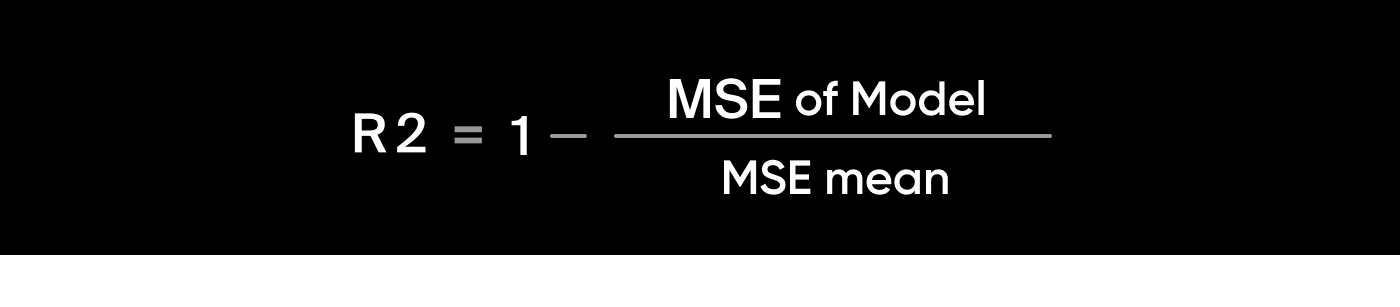
    
The MSE in this formula is the standard deviation, or standard error. It is calculated by the formula:
    
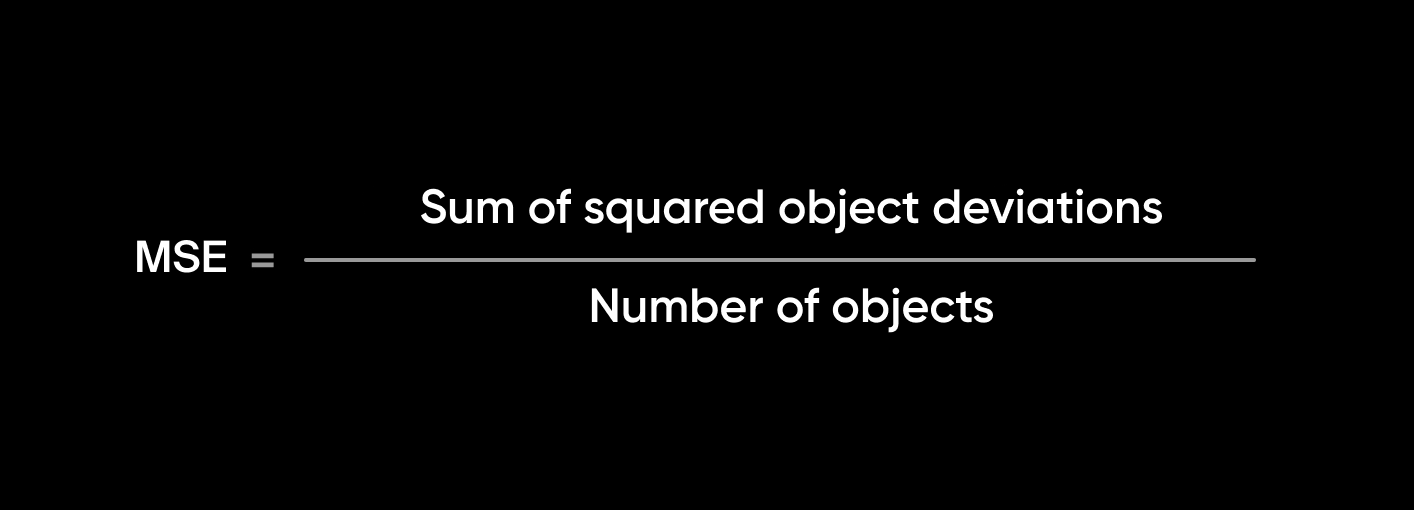
    
Therefore, if our predictions for the Feature Matrix and the Transformed Matrix are the same, provided that the dimensions of the matrix Z and X also match, then the coefficient of determination will remain the same.
    

</div>

## Algorithm verification

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
Our features will be the feature matrix X.
    
Based on the size of this matrix, we will create a random matrix P <code>matrix_P</code>. It will be a square nonsingular matrix with a height equal to the width of the features matrix.
    
Next, we will check the matrix <code>matrix_P</code> for invertibility. To do this, let's find its determinant (determinant) using the function from the NumPy library <code>np.linalg.det()</code>. If the determinant is non-zero, our matrix is invertible, and all the conditions for learning Linear Regression are met. Otherwise, we will create another random matrix and do the same check. We do this as many times as needed.
</div>

In [7]:
# Divide data into features and target feature
features = df.drop('Страховые выплаты', axis=1).values
target = df['Страховые выплаты'].values

# Let's create a random square matrix P, whose height will be equal to the width of the features matrix
matrix_P =np.random.normal(size = (features.shape[1],features.shape[1])) 
display(matrix_P)

# If the determinant of the matrix P is equal to zero, we will create a new random matrix
while True: 
    if np.linalg.det(matrix_P) != 0: 
        display(np.linalg.det(matrix_P))
        break
    else: matrix_P = np.random.normal(size = (features.shape[1],features.shape[1]))
    


array([[ 0.08243137, -0.87061913,  0.06862122, -0.15471271],
       [-0.65087247, -0.23699744,  0.19403388, -2.45014644],
       [-0.34411279, -0.38327663, -1.02802661,  1.38546141],
       [-1.14808897, -0.5126578 ,  0.71973555,  0.01364075]])

3.5809236092867134

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
Create a Linear Regression Model from Scratch
</div>

In [8]:
# Create a Linear Regression Model 
class LR:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w =w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0


# Let's create a function for scaling features, separating features into training and test sets, training the model
def scale_split_and_train_LR(features,target):
    # Scale
    scaler = StandardScaler()
    scaler.fit(features)
    features = scaler.transform(features)
    # Split into training and test sets
    features_train, features_test, target_train, target_test = train_test_split(features,
                                                                                target,
                                                                                test_size=0.25,
                                                                                random_state=12345)
    # Train our model
    model = LR()
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    r2 = r2_score(target_test, predictions)
    print(f'R2 = {round(r2,5)}')
    return round(r2,5), features

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
Let's train our model on the Feature Matrix <code>features</code> and the Transformed Feature Matrix <code>features@matrix_P</code>. If in both cases our R2 metric (coefficient of determination) is the same, then we have successfully protected customer data.
</div>

In [9]:
# Let's train the model on the initial data, before the transformation
R2_normal_df, normal_scaled_features = scale_split_and_train_LR(features, target)

R2 = 0.43523


In [10]:
# Train the model on the transformed data
R2_coded_df, coded_scaled_features = scale_split_and_train_LR(features@matrix_P, target)
coded_df = pd.DataFrame(data = coded_scaled_features, 
                      columns = df.drop('Страховые выплаты', axis=1).columns)

R2 = 0.43523


In [11]:
if R2_normal_df == R2_coded_df:
    print('Customer data successfully protected')
    final = pd.DataFrame(data = [R2_normal_df,R2_coded_df], 
                      columns = ['Determination coefficient'], 
                      index = ['Linear regression','Linear regression after transformation'])
    display(final)
else: print("!ALARM!")

Customer data successfully protected


,Determination coefficient
Linear regression,0.43523
Linear regression after transformation,0.43523


<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
Let's write the final feature matrices in a table for more visual conclusions
</div>

In [12]:
coded_df = pd.DataFrame(data = coded_scaled_features, 
                      columns = df.drop('Страховые выплаты', axis=1).columns)
normal_df = df.drop('Страховые выплаты', axis=1)

<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
### Conclusion

It was necessary to protect the clients' data of the insurance company so that the quality of machine learning models did not deteriorate during the conversion.
    
A data conversion method has been developed to make recovering personal information difficult.
Multiplicating initial personal data by a random matrix was used as a data transformation method. The prediction quality was checked by calculating the coefficient of determination.
    
Project progress:
1. <span><a href="#Loading-data" data-toc-modified-id="Loading-data-1">Loading and exploring data</a></span>;
2. <span><a href="#Matrix-multiplication" data-toc-modified-id="Matrix-multiplication-2">Investigation of matrix multiplication</a></span> by an invertible matrix;
3. Creation of <span><a href="#Conversion-algorithm" data-toc-modified-id="Conversion-algorithm-3">Conversion algorithm</a></span>;
4. <span><a href="#Algorithm-verification" data-toc-modified-id="Algorithm-verification-4">Algorithm verification</a></span> of data transformation and checking the coefficient of determination.

As a result of the study of the data, minor inaccuracies were found in the data on clients' salaries. After correcting inaccuracies in the data, they were brought to the required types, and the original file's size was reduced by about five times.
        
As a result of the project, in paragraph <span><a href="#Matrix-multiplication" data-toc-modified-id="Matrix-multiplication-2">Matrix-multiplication</a></span>, it was theoretically justified why after multiplication features on an invertible matrix, the prediction result, and, accordingly, the coefficient of determination will remain the same.
    
Further, <span><a href="#Conversion-algorithm" data-toc-modified-id="Conversion algorithm-3">Conversion algorithm</a></span> and from the Initial Feature Matrix <code> features</code> (Represented below)   
</div>

In [13]:
normal_df.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
We received a transformed and scaled feature matrix (presented below). As we can see, without special training it is very difficult to understand in the converted data which features are encrypted for each client.
</div>

In [14]:
coded_df.head()

,Пол,Возраст,Зарплата,Члены семьи
0,-0.980117,-0.978964,-0.978049,0.976405
1,0.190775,0.192793,0.193858,-0.196266
2,1.911760,1.911340,1.910783,-1.910508
3,-0.178571,-0.179557,-0.180317,0.181961
4,1.396755,1.395968,1.395575,-1.395157


<div style='border-radius: 15px; box-shadow: 2px 2px 2px; border: 1px solid green; padding: 20px'>
    
After training the Linear Regression on the Initial and Transformed matrices, we obtained the following values of the determination coefficient:
    
|Training|Coefficient of determination|
|:---|:---:|
|On the initial data|0.43523|
|On the transformed data|0.43523|

<hr>
    
As a result, we managed to create, based on a simple transformation of the multiplication of the initial data by a reversible matrix, the protection of the personal data of the clients of the insurance company.
</div>